In [31]:
import pandas as pd
import seaborn as sns
import folium

In [2]:
df = pd.read_csv('../data/ru_lat_lng.csv')

In [4]:
df.head()

,name,country,subcountry,geonameid,lat,lng
0,Udomlya,Russia,Tverskaya,452949,57.876779,35.005110
1,Sosnovka,Russia,St.-Petersburg,461698,56.253352,51.283364
2,Sasovo,Russia,Rjazan,461699,54.349928,41.924087
3,Zyuzino,Russia,Moscow,461740,55.678753,38.120862
4,Zyablikovo,Russia,Moscow,461835,58.786994,36.710175


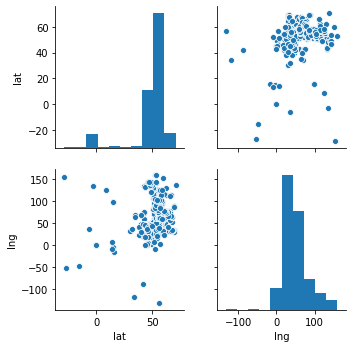

In [5]:
sns.pairplot(df[['lat','lng']]);

In [6]:
neg = df[(df['lat'] < 0) & (df['lng'] < 0)]

In [7]:
neg

,name,country,subcountry,geonameid,lat,lng
96,Uva,Russia,Udmurtiya,477656,-27.258883,-52.307785
514,Kozel’sk,Russia,Kaluga,543348,-15.802118,-47.889062


Definetely something is wrong

In [14]:
neg = df[(df['lat'] < 0)]

In [15]:
neg

,name,country,subcountry,geonameid,lat,lng
96,Uva,Russia,Udmurtiya,477656,-27.258883,-52.307785
207,Shakhun’ya,Russia,Nizjnij Novgorod,496012,-6.523098,35.114165
499,Biryulëvo Zapadnoye,Russia,MO,541406,-2.926199,133.602471
514,Kozel’sk,Russia,Kaluga,543348,-15.802118,-47.889062
965,Asino,Russia,Tomsk,1511309,-28.863483,153.045795


In [16]:
neg = df[(df['lng'] < 0)]

In [17]:
neg

,name,country,subcountry,geonameid,lat,lng
96,Uva,Russia,Udmurtiya,477656,-27.258883,-52.307785
376,Nikol’skoye,Russia,Moscow,521500,45.047234,-0.190847
377,Nikol’skoye,Russia,Leningrad,521509,45.047234,-0.190847
428,Mar’ino,Russia,Moscow,529237,41.888091,-87.628841
445,Luga,Russia,Leningrad,533690,15.604341,-16.213962
456,L’govskiy,Russia,Kursk,535334,34.048408,-118.252957
514,Kozel’sk,Russia,Kaluga,543348,-15.802118,-47.889062
563,Khosta,Russia,Krasnodarskiy,549424,43.160106,-1.088480
697,Buy,Russia,Kostroma,570508,14.848858,-3.735375
940,Gur’yevsk,Russia,Kemerovo,1506073,52.506509,-8.517583


### Get rid of negative values

In [25]:
no_neg = df[(df['lat'] > 0) & (df['lng'] > 0)]

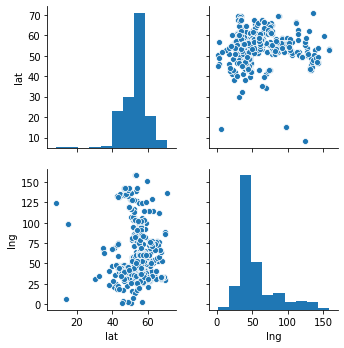

In [26]:
sns.pairplot(no_neg[['lat','lng']]);

In [27]:
no_neg[no_neg['lat'] < 20]

,name,country,subcountry,geonameid,lat,lng
27,Zamoskvorech’ye,Russia,Moscow,465057,15.245560,97.850367
214,Severnyy,Russia,Moscow,496348,8.242548,124.261465
285,Podporozh’ye,Russia,Leningrad,508034,15.245560,97.850367
974,Abaza,Russia,Khakasiya,1512205,14.098294,6.415750
1065,Zagor’ye,Russia,Moscow,6418201,15.245560,97.850367


Definetely 'outliers'

In [29]:
df_new = no_neg[no_neg['lat'] > 20]

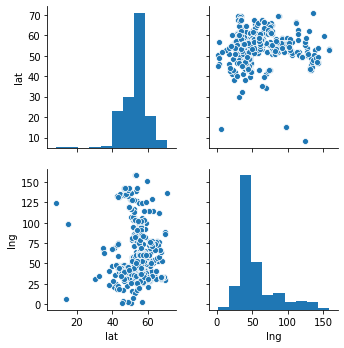

In [30]:
sns.pairplot(no_neg[['lat','lng']]);

In [37]:
df_new[df_new['name']=='Moscow']

,name,country,subcountry,geonameid,lat,lng
405,Moscow,Russia,Moscow,524901,55.755814,37.617635


In [40]:
m = folium.Map(
    location=[55.75, 37.61],
    zoom_start=12,
    tiles='Stamen Terrain'
)

tooltip = 'Click me!'


for (_, city) in df_new.iterrows():
    folium.Marker([city['lat'], city['lng']], popup=city['name'], icon=folium.Icon(icon='circle')).add_to(m)

m

Delete outliers manually